# Final Project, Part 2
### Group Member:
### Akshant Churi, Smit Malik, Samruddhi Choudhari

Our group project is to analyze Chicago road crashes by comparing general crashes information, vehicle crashes, crashes were people are involved. We further plan to add speed camera violation and red light camera violation to see if this areas are prone to crashes.

We plan to use data from Chicago Govt Portal website

All Data sources which we plan to use during this project:
1. crashes dataset https://data.cityofchicago.org/Transportation/Traffic-Crashes-Crashes/85ca-t3if

2. vehicle dataset
https://data.cityofchicago.org/Transportation/Traffic-Crashes-Vehicles/68nd-jvt3

3. people dataset
https://data.cityofchicago.org/Transportation/Traffic-Crashes-People/u6pd-qa9d

4. red light camera violation
https://data.cityofchicago.org/Transportation/Red-Light-Camera-Violations/spqx-js37

5. speed camera violation
https://data.cityofchicago.org/Transportation/Speed-Camera-Violations/hhkd-xvj4


### How this project will be understood by people not an expert in this dataset:
The project aims to analyze the areas that are the most prone to accidents in Chicago based on red light and speed violations. Furthermore, vehicle datasets can be used to understand the crashes better. The dashboard has easy drag and drop functions that the user can use to understand more about the project. It also has colorful charts which are clearly labeled for anyone not an expert in the dataset.

The plot 1 shows the relationship between red light violation and frequency over years from 2014 to 2019. Here the chart has a drop down function for x axis which is the red light violation year. The other interactive function is the slider for the year till which the user can see.

The plot 2 shows relationship between weather condition and count over the 12  months ranging from 1-12. The user can simply drag on the area in the first chart to see changes in the next one. 

The Plot 3 shows how the age distribution regarding the crashes and how crashes changed according to the years

The plot 4 shows the relation between datasets red light and speed violations based on the crashes. The user can simply use the drop down to select a street he/she is interested in and see the relation between all 3 attributes. The street is highlighted in yellow while the red lights in red and speed violation in green color. This gives the user a good visualization on the areas that are the most affected by the any of the two scenarios.

### Our Plan for large dataset:

The datasets that we are planning to use are majorly bigger than 300MB which goes way beyond the github’s threshold. Our first priority is to divide the dataset into multiple chunks depending on the plot. Each dataset will be dedicated to a specific or a few plots. 
If this plan does not come into effect, we will be creating a folder that would consist of the links to the datasets which are stored in the Google drive. Anyone with the link can access those datasets.
For example we made a file called as viz1, viz2 etc which are chunks or aggragated information. 
Note: we have included chunk datasets as well

### Contextual Dataset:
‘Red-Light-Camera-Violation’ and ‘Speed-Camera-Violation. These datasets will help in better analysis of Chicago crashes and support the main datasets. Our main goal here is to assess the relation between the location of crashes and the location of speed camera violations as well as the location of red light camera violations. This will help us analyze streets that are more prone to crashes.  
##### source to the contextual datasets:
1. red light camera violation
https://data.cityofchicago.org/Transportation/Red-Light-Camera-Violations/spqx-js37

2. speed camera violation
https://data.cityofchicago.org/Transportation/Speed-Camera-Violations/hhkd-xvj4

In [1]:
#libraries and packages
import pandas as pd
from dateutil import parser
import ipywidgets
from ipywidgets import interactive
import matplotlib.pyplot as plt
import altair as alt
import geopandas as gdp

###  Reading the datasets

In [2]:
#reading datasets
#this files can be downloaded from the above links
df1 = pd.read_csv('Traffic_Crashes_-_Crashes.csv') #crashes
df2 = pd.read_csv('Traffic_Crashes_-_Vehicles.csv') #vehicles
df3 = pd.read_csv('Traffic_Crashes_-_People.csv') #people
df4 = pd.read_csv('Red_Light_Camera_Violations.csv') #red_light violation
df5 = pd.read_csv('Speed_Camera_Violations.csv') #speed camera violation


/var/folders/c5/3sw9j_052v3bcylbyvj179m40000gn/T/ipykernel_69616/620595034.py:3: DtypeWarning: Columns (19,21,40,41,42,44,48,49,50,53,55,58,59,60,61,71) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('Traffic_Crashes_-_Vehicles.csv') #vehicles
/var/folders/c5/3sw9j_052v3bcylbyvj179m40000gn/T/ipykernel_69616/620595034.py:4: DtypeWarning: Columns (20,24,25,26,29) have mixed types. Specify dtype option on import or set low_memory=False.
  df3 = pd.read_csv('Traffic_Crashes_-_People.csv') #people


# Exploratory Data Analysis for all the datasets

### Dataframe 1, Crashes

In [3]:
df1.head() #top 5 elements

,CRASH_RECORD_ID,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,JC199149,NaN,03/25/2019 02:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,...,0.0,1.0,2.0,0.0,14,2,3,41.884547,-87.641201,POINT (-87.64120093714 41.884547224337)
1,792b539deaaad65ee5b4a9691d927a34d298eb33d42af0...,JB422857,NaN,09/05/2018 08:40:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,...,0.0,0.0,2.0,0.0,8,4,9,41.968562,-87.740659,POINT (-87.740659314632 41.968562453871)
2,0115ade9a755e835255508463f7e9c4a9a0b47e9304238...,JF318029,NaN,07/15/2022 12:45:00 AM,30,UNKNOWN,UNKNOWN,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,...,0.0,0.0,2.0,0.0,0,6,7,41.886336,-87.716203,POINT (-87.716203130599 41.886336409761)
3,05b1982cdba5d8a00e7e76ad1ecdab0e598429f78481d2...,JF378711,NaN,08/29/2022 11:30:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,...,0.0,0.0,3.0,0.0,11,2,8,41.749348,-87.721097,POINT (-87.721096727406 41.749348170421)
4,017040c61958d2fa977c956b2bd2d6759ef7754496dc96...,JF324552,NaN,07/15/2022 06:50:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,...,0.0,0.0,2.0,0.0,18,6,7,41.925111,-87.667997,POINT (-87.667997321599 41.925110815832)


In [4]:
df1.shape #dimension

(671657, 49)

In [5]:
#for loop to analyze each column

for i in list(df1.columns):
    print('column: ',i)
    print('unique values: ',len(df1[i].unique()))
    print('null values: ',df1[i].isnull().sum())
    print('----------------------')

column:  CRASH_RECORD_ID
unique values:  671657
null values:  0
----------------------
column:  RD_NO
unique values:  667344
null values:  4314
----------------------
column:  CRASH_DATE_EST_I
unique values:  3
null values:  620780
----------------------
column:  CRASH_DATE
unique values:  439050
null values:  0
----------------------
column:  POSTED_SPEED_LIMIT
unique values:  44
null values:  0
----------------------
column:  TRAFFIC_CONTROL_DEVICE
unique values:  19
null values:  0
----------------------
column:  DEVICE_CONDITION
unique values:  8
null values:  0
----------------------
column:  WEATHER_CONDITION
unique values:  12
null values:  0
----------------------
column:  LIGHTING_CONDITION
unique values:  6
null values:  0
----------------------
column:  FIRST_CRASH_TYPE
unique values:  18
null values:  0
----------------------
column:  TRAFFICWAY_TYPE
unique values:  20
null values:  0
----------------------
column:  LANE_CNT
unique values:  42
null values:  472663
---------

In [6]:
df1.describe() 

,POSTED_SPEED_LIMIT,LANE_CNT,STREET_NO,BEAT_OF_OCCURRENCE,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE
count,671657.000000,1.989940e+05,671657.000000,671652.000000,671657.000000,670214.000000,670214.000000,670214.000000,670214.000000,670214.000000,670214.000000,670214.0,671657.000000,671657.000000,671657.000000,667443.000000,667443.000000
mean,28.364278,1.333096e+01,3681.166478,1238.830256,2.034588,0.185408,0.001164,0.019974,0.104488,0.059782,2.008363,0.0,13.217578,4.126329,6.730943,41.854498,-87.673352
std,6.280285,2.961713e+03,2899.280216,705.464563,0.451561,0.558534,0.037112,0.164951,0.416064,0.314412,1.158862,0.0,5.550830,1.980133,3.372872,0.331316,0.672790
min,0.000000,0.000000e+00,0.000000,111.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000,0.000000,-87.936193
25%,30.000000,2.000000e+00,1232.000000,712.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,9.000000,2.000000,4.000000,41.781228,-87.721426
50%,30.000000,2.000000e+00,3200.000000,1135.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,14.000000,4.000000,7.000000,41.874516,-87.673667
75%,30.000000,4.000000e+00,5600.000000,1822.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,17.000000,6.000000,10.000000,41.924021,-87.632994
max,99.000000,1.191625e+06,451100.000000,6100.000000,18.000000,21.000000,4.000000,7.000000,21.000000,15.000000,61.000000,0.0,23.000000,7.000000,12.000000,42.022780,0.000000


we are further eliminating columns which have more than 30% of the data not available

In [7]:
bd_1 = [x for x in df1.columns if df1[x].isnull().mean() >= 0.3]
bd_1

['CRASH_DATE_EST_I',
 'LANE_CNT',
 'INTERSECTION_RELATED_I',
 'NOT_RIGHT_OF_WAY_I',
 'HIT_AND_RUN_I',
 'PHOTOS_TAKEN_I',
 'STATEMENTS_TAKEN_I',
 'DOORING_I',
 'WORK_ZONE_I',
 'WORK_ZONE_TYPE',
 'WORKERS_PRESENT_I']

In [8]:
df1.drop(bd_1, inplace= True, axis = 1)# remove columns with a lot of null values
df1.shape

(671657, 38)

In [9]:
#selecting useful columns for further analysis
df1_1=df1[['CRASH_RECORD_ID','STREET_NAME','CRASH_DATE','LATITUDE', 'LONGITUDE','POSTED_SPEED_LIMIT','WEATHER_CONDITION', 'LIGHTING_CONDITION','ROADWAY_SURFACE_COND','DAMAGE']]
df1_1.head()

,CRASH_RECORD_ID,STREET_NAME,CRASH_DATE,LATITUDE,LONGITUDE,POSTED_SPEED_LIMIT,WEATHER_CONDITION,LIGHTING_CONDITION,ROADWAY_SURFACE_COND,DAMAGE
0,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,RANDOLPH ST,03/25/2019 02:43:00 PM,41.884547,-87.641201,30,CLEAR,DAYLIGHT,DRY,"OVER $1,500"
1,792b539deaaad65ee5b4a9691d927a34d298eb33d42af0...,ELSTON AVE,09/05/2018 08:40:00 AM,41.968562,-87.740659,30,CLEAR,DAYLIGHT,DRY,"OVER $1,500"
2,0115ade9a755e835255508463f7e9c4a9a0b47e9304238...,CENTRAL PARK AVE,07/15/2022 12:45:00 AM,41.886336,-87.716203,30,CLEAR,"DARKNESS, LIGHTED ROAD",DRY,"OVER $1,500"
3,05b1982cdba5d8a00e7e76ad1ecdab0e598429f78481d2...,79TH ST,08/29/2022 11:30:00 AM,41.749348,-87.721097,30,CLEAR,DAYLIGHT,DRY,"$501 - $1,500"
4,017040c61958d2fa977c956b2bd2d6759ef7754496dc96...,ASHLAND AVE,07/15/2022 06:50:00 PM,41.925111,-87.667997,30,CLEAR,DAYLIGHT,DRY,"OVER $1,500"


In [10]:
df1_1.shape #shape after modification

(671657, 10)

### Dataframe 2, Vehicle

In [11]:
df2.head() #top 5 elements

,CRASH_UNIT_ID,CRASH_RECORD_ID,RD_NO,CRASH_DATE,UNIT_NO,UNIT_TYPE,NUM_PASSENGERS,VEHICLE_ID,CMRC_VEH_I,MAKE,...,TRAILER1_LENGTH,TRAILER2_LENGTH,TOTAL_VEHICLE_LENGTH,AXLE_CNT,VEHICLE_CONFIG,CARGO_BODY_TYPE,LOAD_TYPE,HAZMAT_OUT_OF_SERVICE_I,MCS_OUT_OF_SERVICE_I,HAZMAT_CLASS
0,829999,24ddf9fd8542199d832e1c223cc474e5601b356f1d77a6...,JD124535,01/22/2020 06:25:00 AM,1,DRIVER,NaN,796949.0,NaN,INFINITI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,749947,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,JC451435,09/28/2019 03:30:00 AM,1,DRIVER,NaN,834816.0,NaN,HONDA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,749949,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,JC451435,09/28/2019 03:30:00 AM,2,PARKED,NaN,834819.0,NaN,TOYOTA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,749950,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,JC451435,09/28/2019 03:30:00 AM,3,PARKED,NaN,834817.0,NaN,GENERAL MOTORS CORPORATION (GMC),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,871921,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,JD208731,04/13/2020 10:50:00 PM,2,DRIVER,NaN,827212.0,NaN,BUICK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df2.shape #dimension

(1368826, 72)

In [13]:
#for loop to analyze each column

for i in list(df2.columns):
    print('column: ',i)
    print('unique values: ',len(df2[i].unique()))
    print('null values: ',df2[i].isnull().sum())
    print('----------------------')

column:  CRASH_UNIT_ID
unique values:  1368826
null values:  0
----------------------
column:  CRASH_RECORD_ID
unique values:  671657
null values:  0
----------------------
column:  RD_NO
unique values:  667344
null values:  8845
----------------------
column:  CRASH_DATE
unique values:  439069
null values:  0
----------------------
column:  UNIT_NO
unique values:  20
null values:  0
----------------------
column:  UNIT_TYPE
unique values:  10
null values:  1893
----------------------
column:  NUM_PASSENGERS
unique values:  43
null values:  1165798
----------------------
column:  VEHICLE_ID
unique values:  1337741
null values:  31086
----------------------
column:  CMRC_VEH_I
unique values:  3
null values:  1343253
----------------------
column:  MAKE
unique values:  1243
null values:  31091
----------------------
column:  MODEL
unique values:  2607
null values:  31235
----------------------
column:  LIC_PLATE_STATE
unique values:  53
null values:  152246
----------------------
column:

In [14]:
df2.describe() 

,CRASH_UNIT_ID,UNIT_NO,NUM_PASSENGERS,VEHICLE_ID,VEHICLE_YEAR,OCCUPANT_CNT,CMV_ID,TRAILER1_LENGTH,TRAILER2_LENGTH,TOTAL_VEHICLE_LENGTH,AXLE_CNT
count,1.368826e+06,1.368826e+06,203028.000000,1.337740e+06,1.120163e+06,1.337740e+06,14374.000000,2146.000000,64.000000,2613.000000,3855.000000
mean,7.317602e+05,4.324157e+00,1.471364,6.960622e+05,2.013650e+03,1.079349e+00,8021.900306,48.432898,45.468750,53.176043,10.481971
std,4.244287e+05,3.229176e+03,1.051095,4.016065e+05,1.429367e+02,7.835435e-01,4651.599949,21.449337,28.114826,31.777479,418.851275
min,2.000000e+00,0.000000e+00,1.000000,2.000000e+00,1.900000e+03,0.000000e+00,1.000000,1.000000,2.000000,1.000000,1.000000
25%,3.629262e+05,1.000000e+00,1.000000,3.485688e+05,2.007000e+03,1.000000e+00,3969.250000,44.250000,24.750000,35.000000,2.000000
50%,7.329115e+05,2.000000e+00,1.000000,6.963695e+05,2.012000e+03,1.000000e+00,8047.500000,53.000000,50.000000,53.000000,3.000000
75%,1.099914e+06,2.000000e+00,2.000000,1.043438e+06,2.016000e+03,1.000000e+00,12070.750000,53.000000,53.500000,66.000000,5.000000
max,1.465752e+06,3.778035e+06,59.000000,1.393194e+06,9.999000e+03,9.900000e+01,16040.000000,740.000000,123.000000,999.000000,26009.000000


we are further eliminating columns which have more than 30% of the data not available

In [15]:
bd_2 = [x for x in df2.columns if df2[x].isnull().mean() >= 0.3]
bd_2

['NUM_PASSENGERS',
 'CMRC_VEH_I',
 'TOWED_I',
 'FIRE_I',
 'EXCEED_SPEED_LIMIT_I',
 'TOWED_BY',
 'TOWED_TO',
 'AREA_00_I',
 'AREA_01_I',
 'AREA_02_I',
 'AREA_03_I',
 'AREA_04_I',
 'AREA_05_I',
 'AREA_06_I',
 'AREA_07_I',
 'AREA_08_I',
 'AREA_09_I',
 'AREA_10_I',
 'AREA_11_I',
 'AREA_12_I',
 'AREA_99_I',
 'CMV_ID',
 'USDOT_NO',
 'CCMC_NO',
 'ILCC_NO',
 'COMMERCIAL_SRC',
 'GVWR',
 'CARRIER_NAME',
 'CARRIER_STATE',
 'CARRIER_CITY',
 'HAZMAT_PLACARDS_I',
 'HAZMAT_NAME',
 'UN_NO',
 'HAZMAT_PRESENT_I',
 'HAZMAT_REPORT_I',
 'HAZMAT_REPORT_NO',
 'MCS_REPORT_I',
 'MCS_REPORT_NO',
 'HAZMAT_VIO_CAUSE_CRASH_I',
 'MCS_VIO_CAUSE_CRASH_I',
 'IDOT_PERMIT_NO',
 'WIDE_LOAD_I',
 'TRAILER1_WIDTH',
 'TRAILER2_WIDTH',
 'TRAILER1_LENGTH',
 'TRAILER2_LENGTH',
 'TOTAL_VEHICLE_LENGTH',
 'AXLE_CNT',
 'VEHICLE_CONFIG',
 'CARGO_BODY_TYPE',
 'LOAD_TYPE',
 'HAZMAT_OUT_OF_SERVICE_I',
 'MCS_OUT_OF_SERVICE_I',
 'HAZMAT_CLASS']

In [16]:
df2.drop(bd_2, inplace= True, axis = 1)# remove columns with a lot of null values
df2.shape

(1368826, 18)

In [17]:
#useful columns for further analysis
df2_2=df2[['CRASH_RECORD_ID','VEHICLE_ID','CRASH_DATE','UNIT_TYPE','MAKE','MODEL','VEHICLE_TYPE', 'VEHICLE_USE']]
df2_2.head()

,CRASH_RECORD_ID,VEHICLE_ID,CRASH_DATE,UNIT_TYPE,MAKE,MODEL,VEHICLE_TYPE,VEHICLE_USE
0,24ddf9fd8542199d832e1c223cc474e5601b356f1d77a6...,796949.0,01/22/2020 06:25:00 AM,DRIVER,INFINITI,UNKNOWN,PASSENGER,PERSONAL
1,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,834816.0,09/28/2019 03:30:00 AM,DRIVER,HONDA,CIVIC,PASSENGER,PERSONAL
2,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,834819.0,09/28/2019 03:30:00 AM,PARKED,TOYOTA,YARIS,UNKNOWN/NA,PERSONAL
3,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,834817.0,09/28/2019 03:30:00 AM,PARKED,GENERAL MOTORS CORPORATION (GMC),SIERRA,UNKNOWN/NA,UNKNOWN/NA
4,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,827212.0,04/13/2020 10:50:00 PM,DRIVER,BUICK,ENCORE,PASSENGER,PERSONAL


In [18]:
df2_2.shape #final dimension after modification

(1368826, 8)

### Dataframe 3, People

In [19]:
df3.head() #top 5 elements

,PERSON_ID,PERSON_TYPE,CRASH_RECORD_ID,RD_NO,VEHICLE_ID,CRASH_DATE,SEAT_NO,CITY,STATE,ZIPCODE,...,EMS_RUN_NO,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,PEDPEDAL_ACTION,PEDPEDAL_VISIBILITY,PEDPEDAL_LOCATION,BAC_RESULT,BAC_RESULT VALUE,CELL_PHONE_USE
0,O749947,DRIVER,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,JC451435,834816.0,09/28/2019 03:30:00 AM,NaN,CHICAGO,IL,60651,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
1,O871921,DRIVER,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,JD208731,827212.0,04/13/2020 10:50:00 PM,NaN,CHICAGO,IL,60620,...,NaN,NONE,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
2,O10018,DRIVER,71162af7bf22799b776547132ebf134b5b438dcf3dac6b...,HY484534,9579.0,11/01/2015 05:00:00 AM,NaN,NaN,NaN,NaN,...,NaN,IMPROPER BACKING,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
3,O10038,DRIVER,c21c476e2ccc41af550b5d858d22aaac4ffc88745a1700...,HY484750,9598.0,11/01/2015 08:00:00 AM,NaN,NaN,NaN,NaN,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
4,O10039,DRIVER,eb390a4c8e114c69488f5fb8a097fe629f5a92fd528cf4...,HY484778,9600.0,11/01/2015 10:15:00 AM,NaN,NaN,NaN,NaN,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN


In [20]:
df3.shape #dimension

(1473483, 30)

In [21]:
#for loop to analyze each column

for i in list(df3.columns):
    print('column: ',i)
    print('unique values: ',len(df3[i].unique()))
    print('null values: ',df3[i].isnull().sum())
    print('----------------------')

column:  PERSON_ID
unique values:  1473483
null values:  0
----------------------
column:  PERSON_TYPE
unique values:  6
null values:  0
----------------------
column:  CRASH_RECORD_ID
unique values:  670214
null values:  0
----------------------
column:  RD_NO
unique values:  665918
null values:  9355
----------------------
column:  VEHICLE_ID
unique values:  1160164
null values:  29050
----------------------
column:  CRASH_DATE
unique values:  438300
null values:  0
----------------------
column:  SEAT_NO
unique values:  12
null values:  1174755
----------------------
column:  CITY
unique values:  11967
null values:  396853
----------------------
column:  STATE
unique values:  53
null values:  382747
----------------------
column:  ZIPCODE
unique values:  12994
null values:  489836
----------------------
column:  SEX
unique values:  4
null values:  22910
----------------------
column:  AGE
unique values:  117
null values:  427845
----------------------
column:  DRIVERS_LICENSE_STATE


In [22]:
df3.describe() 

,VEHICLE_ID,SEAT_NO,AGE,BAC_RESULT VALUE
count,1.444433e+06,298728.000000,1.045638e+06,1777.000000
mean,6.910865e+05,4.160952,3.783059e+01,0.169527
std,4.007051e+05,2.198519,1.710561e+01,0.102325
min,2.000000e+00,1.000000,-1.770000e+02,0.000000
25%,3.458810e+05,3.000000,2.500000e+01,0.120000
50%,6.855450e+05,3.000000,3.500000e+01,0.170000
75%,1.038584e+06,5.000000,5.000000e+01,0.220000
max,1.393183e+06,12.000000,1.100000e+02,1.000000


In [23]:
df3=df3.loc[df3['AGE']>0] #age is always +ve

we are further eliminating columns which have more than 30% of the data not available

In [24]:
bd_3 = [x for x in df3.columns if df3[x].isnull().mean() >= 0.3]
bd_3

['SEAT_NO',
 'DRIVERS_LICENSE_CLASS',
 'HOSPITAL',
 'EMS_AGENCY',
 'EMS_RUN_NO',
 'PEDPEDAL_ACTION',
 'PEDPEDAL_VISIBILITY',
 'PEDPEDAL_LOCATION',
 'BAC_RESULT VALUE',
 'CELL_PHONE_USE']

In [25]:
df3.drop(bd_3, inplace= True, axis = 1)# remove columns with a lot of null values
df3.shape

(1033406, 20)

In [26]:
df3_3=df3[['CRASH_RECORD_ID','VEHICLE_ID','CRASH_DATE','PERSON_TYPE','SEX', 'AGE','SAFETY_EQUIPMENT','AIRBAG_DEPLOYED','INJURY_CLASSIFICATION']]
df3_3.head()


,CRASH_RECORD_ID,VEHICLE_ID,CRASH_DATE,PERSON_TYPE,SEX,AGE,SAFETY_EQUIPMENT,AIRBAG_DEPLOYED,INJURY_CLASSIFICATION
0,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,834816.0,09/28/2019 03:30:00 AM,DRIVER,M,25.0,NONE PRESENT,DEPLOYMENT UNKNOWN,NO INDICATION OF INJURY
1,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,827212.0,04/13/2020 10:50:00 PM,DRIVER,M,37.0,SAFETY BELT USED,DID NOT DEPLOY,NO INDICATION OF INJURY
12,f25f09798b51603bde602ded37fea826fc8b7f962fc3b0...,805348.0,02/23/2020 06:15:00 PM,DRIVER,F,34.0,SAFETY BELT USED,DID NOT DEPLOY,NO INDICATION OF INJURY
13,e9146986f4b0884d00ff3a54da5249263b4b36c15d01ce...,832624.0,04/30/2020 03:05:00 PM,DRIVER,M,53.0,SAFETY BELT USED,DID NOT DEPLOY,NO INDICATION OF INJURY
14,f15ccbd94a8e29ce8424882ce93061d4e1d0deb214acfe...,833984.0,05/03/2020 10:30:00 PM,DRIVER,M,65.0,USAGE UNKNOWN,DID NOT DEPLOY,NO INDICATION OF INJURY


In [27]:
df3_3.shape

(1033406, 9)

### Dataframe 4, Red Light Violation

In [28]:
df4.head()

,INTERSECTION,CAMERA ID,ADDRESS,VIOLATION DATE,VIOLATIONS,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION
0,IRVING PARK AND KILPATRICK,2763.0,4700 W IRVING PARK ROA,04/09/2015,4,NaN,NaN,NaN,NaN,NaN
1,VAN BUREN AND WESTERN,2054.0,2400 W VAN BUREN STREE,04/14/2015,5,NaN,NaN,NaN,NaN,NaN
2,115TH AND HALSTED,2552.0,11500 S HALSTED STREE,04/08/2015,5,NaN,NaN,NaN,NaN,NaN
3,IRVING PARK AND KILPATRICK,2764.0,4700 W IRVING PARK ROA,04/19/2015,4,NaN,NaN,NaN,NaN,NaN
4,ELSTON AND IRVING PARK,1503.0,3700 W IRVING PARK ROA,04/23/2015,3,NaN,NaN,NaN,NaN,NaN


In [29]:
df4.shape

(801605, 10)

In [30]:
df4.describe()

,CAMERA ID,VIOLATIONS,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE
count,801316.000000,801605.000000,7.597310e+05,7.597310e+05,759731.000000,759731.000000
mean,1876.287387,6.030142,1.157352e+06,1.899250e+06,41.879295,-87.697724
std,515.090994,7.838444,1.402888e+04,3.028840e+04,0.083255,0.051107
min,1002.000000,1.000000,1.125717e+06,1.825911e+06,41.677721,-87.812781
25%,1454.000000,2.000000,1.146774e+06,1.873078e+06,41.807727,-87.736249
50%,1871.000000,4.000000,1.157189e+06,1.907723e+06,41.902714,-87.697765
75%,2314.000000,7.000000,1.167172e+06,1.921577e+06,41.940241,-87.662293
max,8313.000000,186.000000,1.191188e+06,1.947754e+06,42.012371,-87.575293


In [31]:
#for loop to analyze each column

for i in list(df4.columns):
    print('column: ',i)
    print('unique values: ',len(df4[i].unique()))
    print('null values: ',df4[i].isnull().sum())
    print('----------------------')

column:  INTERSECTION
unique values:  183
null values:  0
----------------------
column:  CAMERA ID
unique values:  366
null values:  289
----------------------
column:  ADDRESS
unique values:  317
null values:  0
----------------------
column:  VIOLATION DATE
unique values:  3051
null values:  0
----------------------
column:  VIOLATIONS
unique values:  161
null values:  0
----------------------
column:  X COORDINATE
unique values:  298
null values:  41874
----------------------
column:  Y COORDINATE
unique values:  298
null values:  41874
----------------------
column:  LATITUDE
unique values:  298
null values:  41874
----------------------
column:  LONGITUDE
unique values:  298
null values:  41874
----------------------
column:  LOCATION
unique values:  298
null values:  41874
----------------------


we are further eliminating columns which have more than 30% of the data not available

In [32]:
bd_4 = [x for x in df4.columns if df4[x].isnull().mean() >= 0.3]
bd_4

[]

In [33]:
df4.drop(bd_4, inplace= True, axis = 1)# remove columns with a lot of null values
df4.shape

(801605, 10)

In [34]:
df4_4=df4[['CAMERA ID','VIOLATION DATE','VIOLATIONS','LATITUDE','LONGITUDE']]
df4_4.head()

,CAMERA ID,VIOLATION DATE,VIOLATIONS,LATITUDE,LONGITUDE
0,2763.0,04/09/2015,4,NaN,NaN
1,2054.0,04/14/2015,5,NaN,NaN
2,2552.0,04/08/2015,5,NaN,NaN
3,2764.0,04/19/2015,4,NaN,NaN
4,1503.0,04/23/2015,3,NaN,NaN


### Dataframe 5, Speed Camera Violation

In [35]:
df5.head()

,ADDRESS,CAMERA ID,VIOLATION DATE,VIOLATIONS,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION
0,1111 N HUMBOLDT,CHI010,04/10/2015,67,NaN,NaN,NaN,NaN,NaN
1,1111 N HUMBOLDT,CHI010,04/25/2015,71,NaN,NaN,NaN,NaN,NaN
2,1111 N HUMBOLDT,CHI010,04/14/2015,38,NaN,NaN,NaN,NaN,NaN
3,1111 N HUMBOLDT,CHI010,04/16/2015,55,NaN,NaN,NaN,NaN,NaN
4,1111 N HUMBOLDT,CHI010,04/24/2015,54,NaN,NaN,NaN,NaN,NaN


In [36]:
df5.shape

(317468, 9)

In [37]:
df5.describe()

,VIOLATIONS,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE
count,317468.000000,3.054070e+05,3.054070e+05,305407.000000,305407.000000
mean,38.011337,1.159566e+06,1.893262e+06,41.862813,-87.689772
std,52.751942,1.627575e+04,3.219442e+04,0.088541,0.059221
min,1.000000,1.121638e+06,1.820629e+06,41.663174,-87.828317
25%,8.000000,1.149548e+06,1.868078e+06,41.793493,-87.726205
50%,20.000000,1.159529e+06,1.898488e+06,41.877243,-87.688862
75%,47.000000,1.167695e+06,1.920991e+06,41.939040,-87.661138
max,827.000000,1.203645e+06,1.943342e+06,42.000260,-87.529848


In [38]:
#for loop to analyze each column

for i in list(df5.columns):
    print('column: ',i)
    print('unique values: ',len(df5[i].unique()))
    print('null values: ',df5[i].isnull().sum())
    print('----------------------')

column:  ADDRESS
unique values:  165
null values:  0
----------------------
column:  CAMERA ID
unique values:  163
null values:  0
----------------------
column:  VIOLATION DATE
unique values:  3049
null values:  0
----------------------
column:  VIOLATIONS
unique values:  626
null values:  0
----------------------
column:  X COORDINATE
unique values:  161
null values:  12061
----------------------
column:  Y COORDINATE
unique values:  161
null values:  12061
----------------------
column:  LATITUDE
unique values:  161
null values:  12061
----------------------
column:  LONGITUDE
unique values:  161
null values:  12061
----------------------
column:  LOCATION
unique values:  161
null values:  12061
----------------------


we are further eliminating columns which have more than 30% of the data not available

In [39]:
bd_5 = [x for x in df5.columns if df5[x].isnull().mean() >= 0.3]
bd_5

[]

In [40]:
df5.drop(bd_5, inplace= True, axis = 1)# remove columns with a lot of null values
df5.shape

(317468, 9)

In [41]:
df5_5=df5[['CAMERA ID','VIOLATION DATE','VIOLATIONS','LATITUDE','LONGITUDE']]
df5_5.head()

,CAMERA ID,VIOLATION DATE,VIOLATIONS,LATITUDE,LONGITUDE
0,CHI010,04/10/2015,67,NaN,NaN
1,CHI010,04/25/2015,71,NaN,NaN
2,CHI010,04/14/2015,38,NaN,NaN
3,CHI010,04/16/2015,55,NaN,NaN
4,CHI010,04/24/2015,54,NaN,NaN


In [42]:
col = ['LATITUDE', 'LONGITUDE'] #remove rows where there are null values
df5_5 = df5_5.dropna(axis=0, subset= col)
df4_4 = df4_4.dropna(axis=0, subset= col)
df1_1 = df1_1.dropna(axis=0, subset= col)

In [43]:
df5_5.shape, df4_4.shape, df1_1.shape

((305407, 5), (759731, 5), (667443, 10))

# Maintaining Uniform Date Range

In [44]:
#convert column to datetime

def date_format(df):
    year=[]
    month=[]
    day_of_month=[]
    day=[]
    hour=[]
    minute=[]
    second=[]

    dayss= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
    for i in list(df['DATE']): #new column
            d=parser.parse(i)
            year.append(d.year)
            month.append(d.month)
            day_of_month.append(d.day)
            day.append(dayss[d.weekday()])
            hour.append(d.hour)
            minute.append(d.minute)
            second.append(d.second)

    df['year']=year
    df['month']=month
    df['day_of_month']=day_of_month
    df['hour']=hour
    df['minute']=minute
    df['second']=second
    df['day']=day #mon,tue,wed..etc
    #adding to the main dataset


In [45]:
#change the name of date column in all the dataframe by making it uniform

df11=df1_1.rename(columns={'CRASH_DATE': 'DATE'})
df21=df2_2.rename(columns={'CRASH_DATE': 'DATE'})
df31=df3_3.rename(columns={'CRASH_DATE': 'DATE'})
df41=df4_4.rename(columns={'VIOLATION DATE': 'DATE'})
df51=df5_5.rename(columns={'VIOLATION DATE': 'DATE'})


In [46]:
#calling the function
date_format(df11)
date_format(df21)
date_format(df31)
date_format(df41)
date_format(df51)

In [47]:
#finding minimum date:
print('df1 traffic crashes:', min(df11['year']),min(df11['month']),min(df11['day_of_month']) )
print('df2 traffic crashes vehicle:', min(df21['year']),min(df21['month']),min(df21['day_of_month']) )
print('df3 traffic crashes people:', min(df31['year']),min(df31['month']),min(df31['day_of_month']) )
print('df4 traffic crashes red violation:', min(df41['year']),min(df41['month']),min(df41['day_of_month']) )
print('df5 traffic crashes speed violation:', min(df51['year']),min(df51['month']),min(df51['day_of_month']) )

df1 traffic crashes: 2013 1 1
df2 traffic crashes vehicle: 2013 1 1
df3 traffic crashes people: 2013 1 1
df4 traffic crashes red violation: 2014 1 1
df5 traffic crashes speed violation: 2014 1 1


In [48]:
# as seen the traffic crashes dataset starts from 2013 while violation dataset starts from 2014
#by using LOC filter
df11=df11.loc[df11['year']>2013]
df21=df21.loc[df21['year']>2013]
df31=df31.loc[df31['year']>2013]

In [49]:
#final columns
x=[df11,df21,df31,df41,df51]
for i in x:
    print(i.columns)
    print()

Index(['CRASH_RECORD_ID', 'STREET_NAME', 'DATE', 'LATITUDE', 'LONGITUDE',
       'POSTED_SPEED_LIMIT', 'WEATHER_CONDITION', 'LIGHTING_CONDITION',
       'ROADWAY_SURFACE_COND', 'DAMAGE', 'year', 'month', 'day_of_month',
       'hour', 'minute', 'second', 'day'],
      dtype='object')

Index(['CRASH_RECORD_ID', 'VEHICLE_ID', 'DATE', 'UNIT_TYPE', 'MAKE', 'MODEL',
       'VEHICLE_TYPE', 'VEHICLE_USE', 'year', 'month', 'day_of_month', 'hour',
       'minute', 'second', 'day'],
      dtype='object')

Index(['CRASH_RECORD_ID', 'VEHICLE_ID', 'DATE', 'PERSON_TYPE', 'SEX', 'AGE',
       'SAFETY_EQUIPMENT', 'AIRBAG_DEPLOYED', 'INJURY_CLASSIFICATION', 'year',
       'month', 'day_of_month', 'hour', 'minute', 'second', 'day'],
      dtype='object')

Index(['CAMERA ID', 'DATE', 'VIOLATIONS', 'LATITUDE', 'LONGITUDE', 'year',
       'month', 'day_of_month', 'hour', 'minute', 'second', 'day'],
      dtype='object')

Index(['CAMERA ID', 'DATE', 'VIOLATIONS', 'LATITUDE', 'LONGITUDE', 'year',
       'mon

In [50]:
#save clean files
df11.to_csv('clean_crashes.csv', index=False)
df21.to_csv('clean_vehicle.csv', index=False)
df31.to_csv('clean_people.csv', index=False)
df41.to_csv('clean_red.csv', index=False)
df51.to_csv('clean_speed.csv', index=False)


## Plt 1 Crashes vs Red Light Violation vs Speed Violation

<AxesSubplot:xlabel='year'>

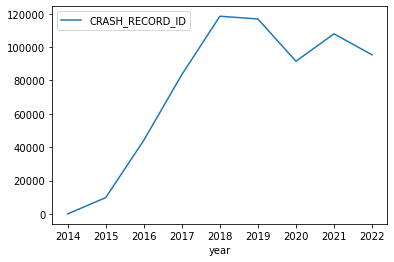

In [51]:
d_year1=df11.groupby('year').count()[['CRASH_RECORD_ID']].reset_index()
d_year1.plot.line(x='year',y='CRASH_RECORD_ID')

<AxesSubplot:xlabel='year'>

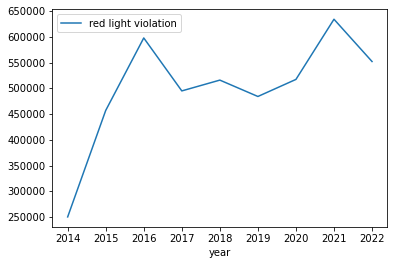

In [52]:
d_year4=df41.groupby('year').sum()[['VIOLATIONS']].reset_index().rename(columns={'VIOLATIONS': 'red light violation'})
d_year4.plot.line(x='year',y='red light violation')

<AxesSubplot:xlabel='year'>

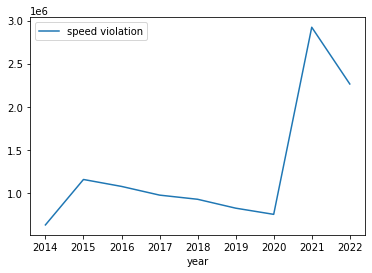

In [53]:
d_year5=df51.groupby('year').sum()[['VIOLATIONS']].reset_index().rename(columns={'VIOLATIONS': 'speed violation'})
d_year5.plot.line(x='year',y='speed violation')

In [54]:
#connecting all by creating a dataframe
viz1=pd.merge((pd.merge(d_year1,d_year4,on='year')),d_year5,on='year')
viz1

,year,CRASH_RECORD_ID,red light violation,speed violation
0,2014,6,250255,630856
1,2015,9780,456953,1157460
2,2016,44096,597662,1077135
3,2017,83472,494884,976290
4,2018,118468,515841,928039
5,2019,116843,484061,825068
6,2020,91501,517199,753297
7,2021,107924,633996,2921993
8,2022,95351,551931,2264343


In [55]:
#viz1.to_csv('viz1.csv', index=False)

<AxesSubplot:>

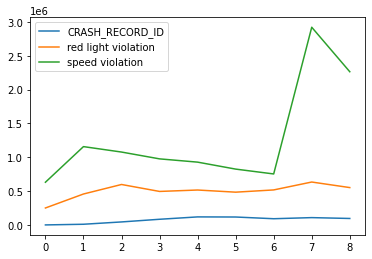

In [56]:
viz1[['CRASH_RECORD_ID','red light violation','speed violation']].plot()

# Interactive Plot 1

The plot 1 shows the relationship between red light violation and frequency over years from 2014 to 2019. Here the chart has a drop down function for x axis which is the red light violation year. The other interactive function is the slider for the year till which the user can see.

In [57]:
#final viz
def chart(x_axis,year):

       
        f=viz1.loc[viz1['year']<=year]
        plt.plot(list(f['year']),list(f[x_axis]))
        plt.xlabel(x_axis)
        plt.ylabel('frequency')
        plt.show()    
        

interactive(chart,
            x_axis=ipywidgets.Dropdown(options=['CRASH_RECORD_ID','red light violation','speed violation'], description="x axis"),
            year=ipywidgets.IntSlider(min=min(viz1['year'])+1,max=max(viz1['year']),step=1,description='till the year')
           )

interactive(children=(Dropdown(description='x axis', options=('CRASH_RECORD_ID', 'red light violation', 'speed…

Findings: The crashes were the most in the year 2018. After selecting red light violations we can see that maximum of them happened in the years 2016, 2021. While the speed violations were maximum in year 2021. This tells us that recently the accidents/violations have increased and there shouls be analyzed in detail.

## Plt 2 weather condition vs light condition vs road surface



In [58]:
viz2=df11[['WEATHER_CONDITION','LIGHTING_CONDITION','ROADWAY_SURFACE_COND','month']]
viz2=viz2.loc[(viz2['WEATHER_CONDITION']!='UNKNOWN') & (viz2['LIGHTING_CONDITION']!='UNKNOWN') & (viz2['ROADWAY_SURFACE_COND']!='UNKNOWN')]

#we do not need unknown
viz2.head()

,WEATHER_CONDITION,LIGHTING_CONDITION,ROADWAY_SURFACE_COND,month
0,CLEAR,DAYLIGHT,DRY,3
1,CLEAR,DAYLIGHT,DRY,9
2,CLEAR,"DARKNESS, LIGHTED ROAD",DRY,7
3,CLEAR,DAYLIGHT,DRY,8
4,CLEAR,DAYLIGHT,DRY,7


In [59]:
viz22=viz2.groupby('WEATHER_CONDITION').count().reset_index(False)

In [60]:
viz22

,WEATHER_CONDITION,LIGHTING_CONDITION,ROADWAY_SURFACE_COND,month
0,"BLOWING SAND, SOIL, DIRT",3,3,3
1,BLOWING SNOW,266,266,266
2,CLEAR,505897,505897,505897
3,CLOUDY/OVERCAST,17772,17772,17772
4,FOG/SMOKE/HAZE,906,906,906
5,FREEZING RAIN/DRIZZLE,1016,1016,1016
6,OTHER,1751,1751,1751
7,RAIN,56539,56539,56539
8,SEVERE CROSS WIND GATE,124,124,124
9,SLEET/HAIL,815,815,815


In [61]:
viz22.dtypes

WEATHER_CONDITION       object
LIGHTING_CONDITION       int64
ROADWAY_SURFACE_COND     int64
month                    int64
dtype: object

In [62]:
#viz22.to_csv('viz22.csv', index=False)

In [63]:
viz2

,WEATHER_CONDITION,LIGHTING_CONDITION,ROADWAY_SURFACE_COND,month
0,CLEAR,DAYLIGHT,DRY,3
1,CLEAR,DAYLIGHT,DRY,9
2,CLEAR,"DARKNESS, LIGHTED ROAD",DRY,7
3,CLEAR,DAYLIGHT,DRY,8
4,CLEAR,DAYLIGHT,DRY,7
...,...,...,...,...
671650,CLEAR,DAYLIGHT,DRY,10
671653,CLOUDY/OVERCAST,"DARKNESS, LIGHTED ROAD",DRY,10
671654,FOG/SMOKE/HAZE,DAYLIGHT,WET,10
671655,FOG/SMOKE/HAZE,DAYLIGHT,WET,10


In [64]:
grouped_single = df11.groupby(['WEATHER_CONDITION', 'month']).count()[['LIGHTING_CONDITION']].reset_index()

In [65]:
grouped_single=grouped_single.rename(columns={'LIGHTING_CONDITION': 'count'})

In [66]:
brush = alt.selection_interval(encodings=['x','y'])
plt1=alt.Chart(grouped_single).mark_bar().encode(
    x='WEATHER_CONDITION:O',
    y='count:Q',
    
).add_selection(
        brush
    )

In [67]:

plt2=alt.Chart(grouped_single).mark_bar().encode(
    x='month:O',
    y='count:Q'
).transform_filter(brush)

In [68]:
final_chart1= plt1 | plt2

# Interactive Plot 2

The plot 2 shows the relationship between weather conditions and counts over the 12  months ranging from 1-12. The user can simply drag on the area in the first chart to see changes in the next one. 

In [69]:
final_chart1

alt.HConcatChart(...)

Findings: In this we can see that most of the accidents happened in the clear weather followed by rain and then cloudy/snow times. After selecting the clear section we can see that accidents were there in all 12 months which were the most in July and August. The snowy weather shows that most accidents happened in the months of January and February.

## Plt 3 people involved in crashes viz

In [70]:
viz33=df31.groupby(['AGE','year']).count()['CRASH_RECORD_ID'].reset_index()
#viz33.to_csv('viz33.csv', index=False)

In [71]:
viz33=viz33.rename(columns={'CRASH_RECORD_ID': 'count'})

In [72]:
viz33.head()

,AGE,year,count
0,1.0,2015,40
1,1.0,2016,208
2,1.0,2017,449
3,1.0,2018,688
4,1.0,2019,625


In [73]:
brush = alt.selection_interval(encodings=['x','y'])
plt3=alt.Chart(viz33).mark_bar().encode(
    x='AGE:Q',
    y='count:Q',
  
).add_selection(
        brush
    )

In [74]:
plt4=alt.Chart(viz33).mark_bar().encode(
    x='year:O',
    y='count:Q',
    color='count:Q'
).transform_filter(brush)

In [75]:
final_chart2= plt3 | plt4

# Interactive Plot 3

In [76]:
final_chart2

alt.HConcatChart(...)

finding: in this plot we can see that the how the age varies for the crashes which took place. This seems to have a bell curve representation which makes it even more interesting. Further, we can see that most of the people involved in crashes are in the range 25-35. we can play with the data by selecting the plot and seeing the changes on the year graph. For example between age 20-40 most crashes occured in the year 2018 and 2019. 

    
    
    

## Plt 4 Maps

In [77]:
chicago = gdp.read_file('https://data.cityofchicago.org/api/geospatial/bbvz-uum9?method=export&format=GeoJSON')

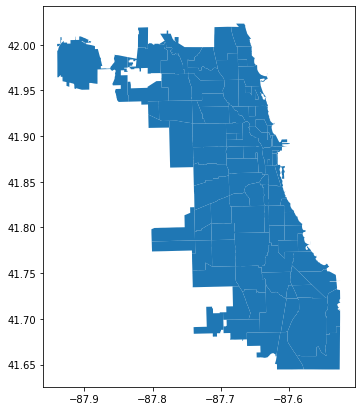

In [78]:
fig, ax = plt.subplots(figsize = (7,7))
chicago.plot(ax = ax)
plt.show()

https://geopandas.org/en/stable/gallery/create_geopandas_from_pandas.html
next I have converted the dataframe to GeoDataFrame

In [79]:
crash = gdp.GeoDataFrame(
    df11, geometry=gdp.points_from_xy(df11['LONGITUDE'], df11['LATITUDE']))

In [80]:
red = gdp.GeoDataFrame(
    df41, geometry=gdp.points_from_xy(df41['LONGITUDE'], df41['LATITUDE']))

In [81]:
speed = gdp.GeoDataFrame(
    df51, geometry=gdp.points_from_xy(df51['LONGITUDE'], df51['LATITUDE']))

In [82]:
crash = crash.loc[crash['LONGITUDE'] < 0]

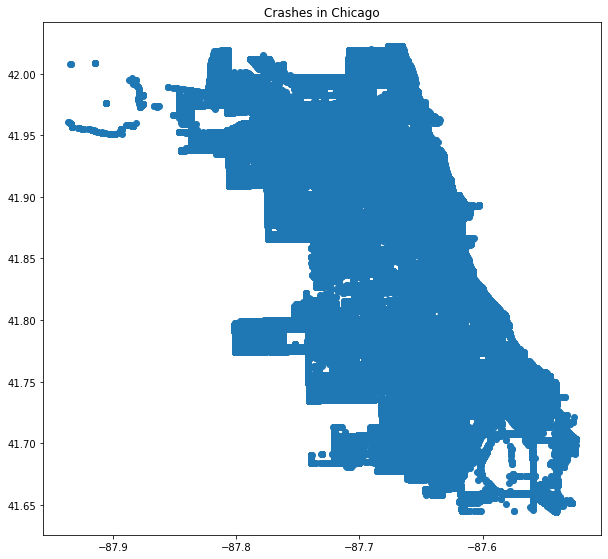

In [83]:
fig, ax = plt.subplots(figsize = (10,10))
crash.plot(ax = ax)
plt.title('Crashes in Chicago')
plt.show()

we are only considering the crashes with 10000+ counts for better visualization

In [84]:
top1000 = crash['STREET_NAME'].value_counts().reset_index(name = 'count').query('count>10000')['index']

In [85]:
crash1 = crash[crash['STREET_NAME'].isin(top1000)]

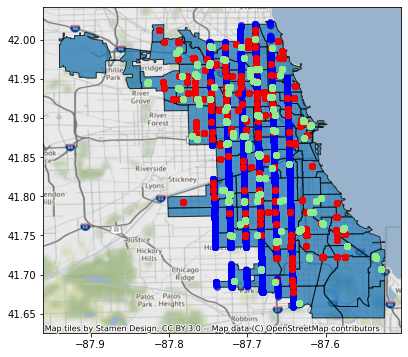

In [86]:
import contextily as ctx

fig, ax = plt.subplots(figsize = (8,6))

chicago.plot(ax = ax, alpha = 0.75, edgecolor = 'black')
crash1.plot(ax = ax, color = 'blue', alpha = 0.1)
red.plot(ax = ax, color = 'red', alpha = 0.1)
speed.plot(ax = ax, color = 'lightgreen', alpha = 0.5)
ctx.add_basemap(ax = ax, crs = chicago.crs)
plt.show()

# Interactive Plot 4

The plot 4 shows the relation between datasets red light and speed violations based on the crashes. The user can simply use the drop down to select a street he/she is interested in and see the relation between all 3 attributes. The street is highlighted in yellow while the red lights in red and speed violation in green color. This gives the user a good visualization of the areas that are the most affected by any of the two scenarios.



In [87]:
import ipywidgets
@ipywidgets.interact(street = crash1['STREET_NAME'].unique())
def my_geopandas_plot(street):
    crash_subset = crash1.loc[(crash1['STREET_NAME'] == street)]
  
    fig,ax = plt.subplots(figsize = (15,10))
    chicago.plot(ax = ax,alpha = 0.75, edgecolor = 'black')
    crash_subset.plot(column='STREET_NAME',ax=ax, color = 'yellow', legend = True, alpha = 0.5, label = 'crashes')
    red.plot(ax=ax, color = 'red', label = 'Red Light Violations')
    speed.plot(ax = ax, color = 'lightgreen', alpha = 0.5, label = 'Speed Violations')
    ctx.add_basemap(ax = ax,crs = chicago.crs)
    plt.legend()
    plt.show()
    
#note: this line might take time to load

interactive(children=(Dropdown(description='street', options=('ASHLAND AVE', 'CICERO AVE', 'PULASKI RD', 'WEST…

Findings: By just looking at this visually we can see that ashland avehas more red light violations and less speed violations. The rest can be due to other scenarios. Here we can see that every street has a different scenario. The cicero ave has the more red violations again. Here we have chosen the TOP 10,000 roads with maximum crashes. As the streets cross each other it is difficult to find crashes on that level so we are looking into avenues.

### Conclusion:
Our future plan is to analyze the people and vehicle dataset in detail. This can be of help to the Chicago government in finding out reasons for the same and prevent crashes in the future. We can also analyze the number of males and females who were involved in the crashes, on which location and if it was due to red light/speed violations or not.

references:
Professor Jill Naimans class notes
1. https://uiuc-ischool-dataviz.github.io/is445_oauoag_fall2022/nbv.html?notebook_name=%2Fis445_oauoag_fall2022%2Fweek07%2FinClass_week07.ipynb


2. https://uiuc-ischool-dataviz.github.io/is445_oauoag_fall2022/nbv.html?notebook_name=%2Fis445_oauoag_fall2022%2Fweek06%2FinClass_week06.ipynb